# ROBOT TRADING


## Descripción del desafío

Vamos a contruir un Robot Trading en Python capaz de tomar decisiones de compra y venta de Bitcoin en tiempo real, ¿interesante verdad?, aqui te proporciono el paso a paso que deberás realizar: <br>

    1.- Configuración del ambiente: Para empezar, puedes utilizar un entorno virtual como Google Colaboratory, o si deseas, puedes usar el editor Python de tu preferencia, sólo asegúrate de tener Python 3.x instalado en tu computadora. También necesitarás instalar algunas librerías de Python que son esenciales para este proyecto, como Pandas, Numpy, Matplotlib, etc. 

    2.- Obtención de datos: Necesitarás acceder a una API que proporcione datos históricos de precios de Bitcoin en formato JSON. Por otro lado, necesitarás realizar Web Scraping en un site de noticias para obtener el precio actual y algunos indicadores de tendencias del Bitcoin.
    
    3.- Limpieza de datos: Una vez que tengas los datos históricos deberás cargarlos en un DataFrame de Pandas para poder manipularlos y analizarlos, deberás identificar y eliminar los outliers, además de tratar cualquier valor nulo o duplicados en la base. Finalmente, con la base limpia, calcula el precio promedio del Bitcoin.

    4.- Tomar decisiones: Una vez que tengas el precio promedio, compáralo con el precio actual y tendencia del Bitcoin, que previamente obtuviste con Web Scraping. Si el precio actual es mayor/igual que la media y la tendencia es de baja, entonces se debe vender, pero si el precio actual es menor que la media y la tendencia es de alta, entonces se debe comprar, sí ninguna de las condiciones anteriores se cumple entonces se debe "esperar".

    5.- Visualización: Utiliza la librería Matplotlib para crear un gráfico donde se muestre la evolución del precio del Bitcoin durante el periodo seleccionado, y una línea recta que pase sobre el precio medio. Por último, muestra un mensaje en el gráfico que indique “Vender”, “Comprar” o “” según sea la decisión del algoritmo.

    6.- Automatización: Finalmente, ahora que tienes el algoritmo de decisión, es hora de automatizar el proceso. Utiliza la librería de Python "time" para ejecutar el algoritmo de decisión cada 5 minutos y actualizar el gráfico.

## 1.1- Configuración del ambiente

Nuestro primer paso será validar nuestra versión de Python.

In [101]:
#Comando para mostrar nuestra versión instalada de python
!python -V

Python 3.11.2


El siguiente paso será la importación de las librerías necesarias para nuestro desarrollo, entre las cuales se encuentran algunas como Pandas, Numpy, Matplotlib o DateTime, y nuestra librería para obtención de datos que será: <br>

<strong>"Yfinance"</strong>, que es una biblioteca de Python que proporciona una interfaz conveniente para descargar datos financieros directamente de Yahoo Finance. Sobre la cual pueden aprender mucho mas en: https://pypi.org/project/yfinance/ y que será una parte importante de nuestro desarrollo.

In [104]:
import pandas as pd             # Libreria para el manejo de estruturas de datos
import numpy as np              # Libreria para el manejo de algunas operaciones matemáticas
import matplotlib.pyplot as plt # Libreria para trabajar con las gráficas necesarias
import yfinance as yf           # Libreria que nos dará acceso a los valores del Bitcoin
import datetime                 # Libreria para apoyarnos con las operaciones direccionadas a fechas


## 2.1- Obtención de datos <br>


Para comprender la actualidad del valor del Bitcoin crearemos una función que obtendrá su valor durante los últimos 7 días, en intervalos de 5 minutos  para lo cual se definirán 2 variables del tipo Datetime: <br><br>
    *end_date*, cuya función será almacenar nuestra fecha actual, y utilizarla como fecha de cierre. <br>
    *start_date*, que será la fecha dónde comenzaremos la extracción de datos, 7 días atrás de nuestra fecha actual. 
    <br><br>
Una vez generadas las variables de fecha, con la función "*download*" de la libreria **yfinance** obtendremos los valores del Bitcoin("BTC-USD") en  intervalos de 5 minutos, datos que necesitaremos para nuestro análisis, y con ellos crearemos el DataFrame llamado df_bitcoin.

In [105]:
# Función para automatizar la tarea de extracción de valores del Bitcoin.
def import_bitcoin_database(): 
    global df_bitcoin

    # Fecha para detener la extracción de datos.
    end_date = datetime.datetime.now() 

    # Fecha de inicio para la extracción de datos.
    start_date = end_date - datetime.timedelta(days=7) 

    # Función para obtener los valores del Bitcoin, en el rango de fechas definido
    # ,y el intervalo de tiempo entre cada dato.
    df_bitcoin = yf.download("BTC-USD", start_date, end_date,interval="5m") 


Una vez realizada nuestra función *import_bitcoin_database()*, nos aseguramos que la extracción de datos correcta ejecutando nuestra función y mostrando una pequeña muestra de los datos que se obtuvieron:

In [106]:
# Ejecución de función.
import_bitcoin_database()

# Ejecutamos una muestra de 15 datos para ver cómo se distribuyen los datos obtenidos.
df_bitcoin.head(15)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-10-23 19:30:00+00:00,31192.494141,31192.494141,31158.685547,31176.695312,31176.695312,0
2023-10-23 19:35:00+00:00,31145.527344,31217.347656,31145.527344,31217.347656,31217.347656,45078528
2023-10-23 19:40:00+00:00,31232.328125,31280.882812,31232.328125,31280.882812,31280.882812,93644800
2023-10-23 19:45:00+00:00,31274.695312,31316.941406,31274.695312,31316.941406,31316.941406,78850048
2023-10-23 19:50:00+00:00,31343.478516,31368.050781,31311.042969,31362.132812,31362.132812,68141056
2023-10-23 19:55:00+00:00,31356.166016,31412.261719,31356.166016,31412.261719,31412.261719,136826880
2023-10-23 20:00:00+00:00,31380.259766,31409.638672,31341.501953,31409.638672,31409.638672,66494464
2023-10-23 20:05:00+00:00,31394.007812,31478.076172,31394.007812,31478.076172,31478.076172,95959040
2023-10-23 20:10:00+00:00,31480.591797,31486.794922,31480.591797,31480.685547,31480.685547,142768128


### Información del DataFrame (df_bitcoin)

**Datetime**: Es el índice del dataframe, y contiene la fecha y hora del intervalo seleccionado, no puede estar duplicado.

**Open**: Contiene el precio del Bitcoin al inicio del intervalo (USD).

**High**: Contiene el precio más alto del Bitcoin durante el intervalo(USD).

**Low**: Contiene el precio más bajo del Bitcoin durante el intervalo(USD).

**Close**: Contiene el precio del Bitcoin al final del intervalo(USD).

**Adj Close**: Contiene el precio de cierre después de ajustes por todas las divisiones y distribuciones de dividendos aplicables

**Volume**: Contiene el total de transacciones hechas durante el intervalo.

### 2.2- Extracción de tendencia del Bitcoin

En está sección nos enfocaremos en obtener la tendencia de los valores del Bitcoin de la siguiente página web: https://coinmarketcap.com,<br> de dónde obtendremos el valor actual del Bitcoin con su ultima actualización en dólares (USD), así como la variación de precio en la última hora.

In [107]:
from bs4 import BeautifulSoup # Libreria para trabar con la información de objetos HTML (Páginas Web)
import requests               # Libreria para trabajar las solicitudes HTTP (Peticiones a servidores Web)

Para la obtención de la última actualización del valor del BitCoin realizaremos Web Scraping mediante el uso de la libreria **BeautifulSoup de bs4**,que nos permitirá poder trabajar con objetos del tipo HTML en este caso una página web, para obtener mas información acerca de la librería, su documentación se puede encontrar en la siguiente dirección: https://beautiful-soup-4.readthedocs.io/en/latest/ <br>

Ademas de utilizar el modulo **requests** para realizar peticiones HTTP, que nos permitirán obtener acceso a la información del servidor Web de una manera sencilla, para obtener mas información acerca de la librería, su documentación se puede encontrar en la siguiente dirección: <br>https://pypi.org/project/requests/

In [128]:
def trends_extract():
    global actual_price, trend

    url = "https://coinmarketcap.com"
    response = requests.get(url)

    # La extracción de información será realizada por medio de un elemento BeautifulSoup 
    # el cual es un tipo de objeto que nos permite trabajar con estructuras HTML, en este caso
    # la página web antes declarada.

    # Iniciamos el proceso validando que nuestra respuesta sea exitosa dada por el servidor web,
    # sí devuelve un 200 significa que la petición fue exitosa, de lo contrario el valor impreso será:
    # "Failed to retrieve the webpage", con una respuesta exitosa el valor se almacenará en una variable,
    # y después será convertida en un objeto "BeautifulSoup", que nos permitirá trabajar con información en lenguaje HTML
    # de una manera sencilla y eficiente.

    if response.status_code == 200: 
        response.encoding = 'utf-8'
        html = response.text
        soup = BeautifulSoup(html, "html.parser") 
    else:
        print("Failed to retrieve the webpage.") 


    # Continuamos obteniendo el valor actual del Bitcoin del objeto BeautifulSoap creado en el paso anterior, 
    # al cual debemos remover el signo de valor $, la coma "," y cualquier espacio extra que contenga 
    # para poder obtener su valor limpio con solo el valor y sus decimales, posteriormente lo convertiremos 
    # en un elemento tipo FLOAT, ya que el valor que obtenemos del BeautifulSoup es un elemento de tipo Texto.

    actual_price = soup.find("div", {"class":["sc-a0353bbc-0 gDrtaY","sc-a0353bbc-0 gDrtaY fall", "sc-a0353bbc-0 gDrtaY rise"]}).getText() 
    actual_price = float(actual_price.replace("$", "").replace(",", ""))
    

    # Para acceder a la tendencia actual del Bitcoin accederemos al valor de 2 clases especificas, esta web 
    # al ser dinámica guarda la tendencia positiva en una clase y la negativa en otra, con lo cual
    # nosotros podemos obtener que tipo de tendencia hay actualmente si sabemos cual de las 2 clases está siendo
    # ejecutada por la web.
    
    icon_trend = soup.find("span", {"class":["sc-d55c02b-0 gUnzUB","sc-d55c02b-0 iwhBxy"]})
    icon_trend = str(icon_trend)

    #Asignamos un valor en caso de la tendencia sea positiva o negativa.
    if 'icon-Caret-down' in icon_trend:
        trend = "Low"
    elif 'icon-Caret-up' in icon_trend:
        trend = "High"


Pasamos a verificar que la función realice la extracción correcta de los valores necesarios para continuar con el programa <br>
y verificamos que las variables tengan sus respectivos valores cargados

In [129]:
#Ejecución de función de WebScraping
trends_extract()

#Impresión de las variables necesarias para validación
print("Precio actual del Bitcoin: " + str(actual_price))
print("La tendencia actual del Bitcoin es: "+ trend)

Precio actual del Bitcoin: 34462.9
La tendencia actual del Bitcoin es: Low


## 3.1- Exploración y limpieza de los datos

Esta exploración será realizada para comprender el contexto de la información, familiarizarnos con la misma, y comenzar a realizar algunas ideas de como abordaremos la creación del modelo.

In [130]:
#Mostramos un resumen breve del tipo de datos que contiene nuestro DataFrame, número de datos, columnas, así como datos erroneos o nulos
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1995 entries, 2023-10-23 19:30:00+00:00 to 2023-10-30 19:25:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1995 non-null   float64
 1   High       1995 non-null   float64
 2   Low        1995 non-null   float64
 3   Close      1995 non-null   float64
 4   Adj Close  1995 non-null   float64
 5   Volume     1995 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 109.1 KB


In [131]:
# Ejecución de algunas estadísticas descriptivas para entender númericamente la distribución de nuestros datos.
# medidas como: "Cuenta", "Media", "Desviación Estándar","Mínimos", "Quartiles"
df_bitcoin.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1.995000e+03
mean,34166.004270,34187.399117,34145.389334,34167.793577,34167.793577,2.806397e+07
std,476.216310,470.980549,477.405216,472.339618,472.339618,1.153924e+08
min,31145.527344,31192.494141,31145.527344,31176.695312,31176.695312,0.000000e+00
25%,34023.685547,34039.101562,34006.632812,34023.150391,34023.150391,0.000000e+00
50%,34152.082031,34169.035156,34139.492188,34153.910156,34153.910156,0.000000e+00
75%,34458.753906,34482.257812,34438.160156,34461.265625,34461.265625,1.992550e+07
max,35116.218750,35150.433594,34950.511719,35044.105469,35044.105469,3.556581e+09


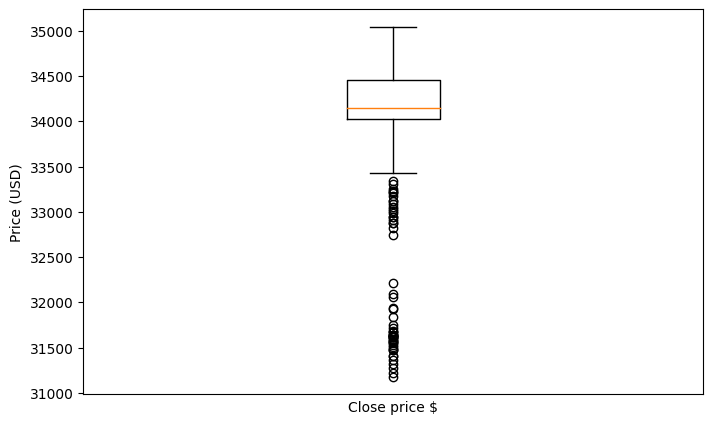

In [132]:
# Mostraremos una gráfica de caja para una rápida y gráfica comprensión de los datos

plt.figure("figure", figsize=(8,5))
plt.boxplot(df_bitcoin["Close"])
plt.xlabel("Close price $")
plt.ylabel("Price (USD)")
plt.xticks([])
plt.show()

### 3.2- Limpieza de los datos


En esta sección nos enfocaremos en desarrollar una función que se encargará de la limpieza de los datos obtenidos anteriormente. <br>
La limpieza se abordará de la siguiente manera, en lo posible: <br>

-Generar una copia de la base df_bitcoin para realizar la limpieza en esta nueva base(df_clean_bitcoin), sin modificar la base original. <br>

-Para la limpieza, se utilizarán los atributos(Columnas): Datetime, Close y Volume. <br>
<blockquote>
        -<strong>Datetime</strong>: Es el índice del dataframe, y contiene la fecha y hora del intervalo seleccionado, no puede estar duplicado.<br>
        -<strong>Close</strong>: Contiene el precio del Bitcoin al final del intervalo.<br>
        -<strong>Volume</strong>: Contiene el total de transacciones hechas durante el intervalo.<br>
</blockquote>

-Identificar duplicados en el atributo "Datetime" y tratarlos para almacenar sólo índices únicos. <br>

-Buscar valores nulos en la columna "Close" y trátarlos.<br>

-Verificar que todos los registros de la base tengan un Volumen(Volume) de transacción mayor a 0, caso contrário, elimínarlos.<br>

-identificar y eliminar los outliers en el precio del Bitcoin("Close"), utilizando un gráfico de boxplot para identificarlos.<br>

-Filtrar o seleccionar únicamente los registros cuyo precio(Close) se encuentre entre el 1er cuartil(Q1) y el 3er cuartil(Q3) del boxplot generado.<br>

-Finalmente, calcular el precio promedio de la columna "Close" y guardaremos el valor en la variable bitcoin_mean.<br>

In [133]:
def data_cleaning():
    global df_clean_bitcoin, bitcoin_mean
    
    # Creamos un DF con la copia de los valores obtenidos con la función copy().
    df_clean_bitcoin = df_bitcoin.copy()
    df_clean_bitcoin = df_clean_bitcoin.reset_index()

    # Limpieza de datos duplicados en el atributo "Datetime"
    df_clean_bitcoin = df_clean_bitcoin.drop_duplicates(subset=["Datetime"])

    # Eliminación de valores nulos del atributo "Close"
    df_clean_bitcoin = df_clean_bitcoin[df_clean_bitcoin.Close.notnull()]

    # Obtenemos solo aquellos valores del atributo "Volume" que sean mayores a "0"
    df_clean_bitcoin = df_clean_bitcoin[df_clean_bitcoin["Volume"]>0]
    

    # Filtrar o seleccionar únicamente los registros cuyo precio("Close") se 
    # encuentren entre el 1er cuartil(Q1) y el 3er cuartil(Q3)
    valor = df_clean_bitcoin["Close"]
    Q1 = valor.quantile(.25)
    Q3 = valor.quantile(.75)
    seleccion = (valor >= Q1) & (valor <= Q3)
    df_clean_bitcoin = df_clean_bitcoin[seleccion]
    df_clean_bitcoin = df_clean_bitcoin.reset_index(drop=True)

    # Calculo de la media del atributo "Close"
    bitcoin_mean = df_clean_bitcoin["Close"].mean()


Una vez que hayamos desarrollado la función *data_cleaning()*, que obtendrá nuestros valores limpios y tratados, procedemos a validar la información. <br>
<br>
Ejecutamos nuestra función, y mostramos el valor de nuestras variables.

In [135]:
# Ejecución de la función de limpieza de datos
data_cleaning()

# Impresión de variables resultantes
print("El valor promedio de cierre es: "+str(bitcoin_mean))

El valor promedio de cierre es: 34300.27028245192


Una vez validadas nuestras variables, mostramos nuestro DataFrame con los valores limpios.

In [136]:
# Impresión de DataFrame resultante de la limpieza de datos
df_clean_bitcoin

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2023-10-23 22:40:00+00:00,32379.609375,34370.437500,32379.609375,34321.128906,34321.128906,1552650240
1,2023-10-24 01:55:00+00:00,33989.128906,34147.531250,33987.808594,34147.531250,34147.531250,167407616
2,2023-10-24 02:00:00+00:00,34166.652344,34354.492188,34166.652344,34354.492188,34354.492188,254320640
3,2023-10-24 02:05:00+00:00,34437.867188,34437.867188,34160.183594,34371.335938,34371.335938,242442240
4,2023-10-24 02:10:00+00:00,34424.980469,34486.449219,34388.628906,34486.449219,34486.449219,314904576
...,...,...,...,...,...,...,...
437,2023-10-30 17:25:00+00:00,34204.214844,34247.484375,34170.261719,34247.484375,34247.484375,181274624
438,2023-10-30 17:30:00+00:00,34271.574219,34272.652344,34255.394531,34255.394531,34255.394531,95356928
439,2023-10-30 19:15:00+00:00,34342.714844,34356.984375,34340.988281,34340.988281,34340.988281,23675904
440,2023-10-30 19:20:00+00:00,34339.535156,34353.960938,34339.535156,34353.308594,34353.308594,3212288


## 4.1- Toma de decisiones

#### Con la obtención de datos confiables por medio de la limpieza, podremos continuar para generar la decisión acerca de que hacer con respecto al precio del Bitcoin y su tendencia basados en los 3 escenarios siguientes:

1.- Sí el precio actual es mayor/igual que el precio promedio y la tendencia es de baja, entonces guardamos la instrucción: ‘Vender’.<br>
2.- Sí el precio actual es menor que el precio promedio y la tendencia es de alta, entonces guardamos la instrucción: ‘Comprar’.<br>
3.- Sí ninguna de las 2 condiciones anteriores se cumple, entonces guardamos la instrucción: 'Esperar'.<br>



In [140]:
def decision():
    global decision_algorithm, marker, marker_color

    # Ciclo para asignar la decisión con base en 2 resultados:
    # la media del cierre(Close) de la moneda y su tendencia(trend).
    
    if actual_price >= bitcoin_mean and trend == "Low":
        decision_algorithm = "Sell"
        marker = "v"
        marker_color = "Red"
    elif actual_price < bitcoin_mean and trend == "High":
        decision_algorithm = "Buy"
        marker = "^"
        marker_color = "Black"
    else:
        decision_algorithm = "Wait"
        marker = ">"
        marker_color = "Purple"


Continuamos con la prueba de nuestra función *decision()*, validando que resulte entre alguno de los 3 posibles escenarios: **Sell**, **Buy** y **Wait**

In [142]:
# Ejecución de nuestra función de decision de tendencia
decision()

# Se realiza la impresión de las variables esperadas, para validar su información
print("La decisión resultante fue: "+decision_algorithm)  # Decisión resultante
print("Nuestra tendencia tiene dirección: "+marker)       # Tendencia
print("El color decidido fue: "+marker_color)             # Color para representar la tendencia

La decisión resultante fue: Sell
Nuestra tendencia tiene dirección: v
El color decidido fue: Red


## 5.1- Visualización

Una vez hayamos realizado todos nuestros procesos de limpieza, así como los procesos de decisión, utilizaremos la información obtenida para desarrollar un gráfico en el cual se muestre la tendencía de los valores del Bitcoin durante el transcurso de los ultimos 7 días.

In [151]:
def data_visualization():
    global df_bitGraph

    # Generamos una DataFrame para trabajar la representación gráfica.
    df_bitGraph = df_bitcoin.copy()

    # Añadimos una columna que contenga el valor promedio.
    df_bitGraph["Average"] = bitcoin_mean

    # Creamos el lienzo de nuestra gráfica.
    plt.rc("figure", figsize = (16,5))

    # Graficamos el valor de cierre, con relación al índice.
    plt.plot(df_bitGraph.index, df_bitcoin["Close"], label="Close", color = "green")

    # Ahora graficamos el promedio, igualmente versus el índice.
    plt.plot(df_bitGraph.index, df_bitGraph["Average"], label="Average", color="black", linestyle = "--")

    # Agregamos una representación distinta al último valor obtenido.
    # Obtenemos el último valor del índice
    last_index = df_bitGraph.index[-1]

    # Último valor en la columna de cierre de precio.
    last_close = df_bitGraph['Close'].iloc[-1]

    # Graficamos el último punto, con una forma y orientación distinta así como su color según rendencia.
    plt.scatter(last_index, last_close, color=marker_color, marker=marker, s=70)


    # PARTE VISUAL DEL GRÁFICO.

    # Aquí eliminamos las líneas del borde del gráfico
    ax = plt.gca()
    ax.spines["right"].set_color("None")
    ax.spines["top"].set_color("None")
    ax.spines["bottom"].set_color("None")
    ax.spines["left"].set_color("None")

    #Visualizamos la cuadrícula del gráfico.
    plt.grid(visible=True)
    #Actualizamos el título.
    plt.title("Bitcoin Price Analysis and Trading Trends")
    #Actualizamos el nombre del eje X.
    plt.xlabel('Date (YYYY-MM-DD)', fontdict={"weight":"bold"})
    #Actualizamos el nombre del eje y. 
    plt.ylabel('Closing price (USD)', fontdict={"weight":"bold"})
    #Genramos la leyenda y ajustamos su posición.
    plt.legend(loc="lower right") 

    #Ahora mostramos en el gráfico cual fue la decisión resultante de nuestro algoritmo para esta muestra de datos.
    plt.annotate("Decision: "+decision_algorithm, xy=(.85, 0.5), xycoords='axes fraction', fontsize=16, color='purple', weight = "bold")

    #Y graficamos.
    plt.show()


Una vez tengamos nuestra función *data_visualization()* procedemos a realizar la ejecución de la misma.

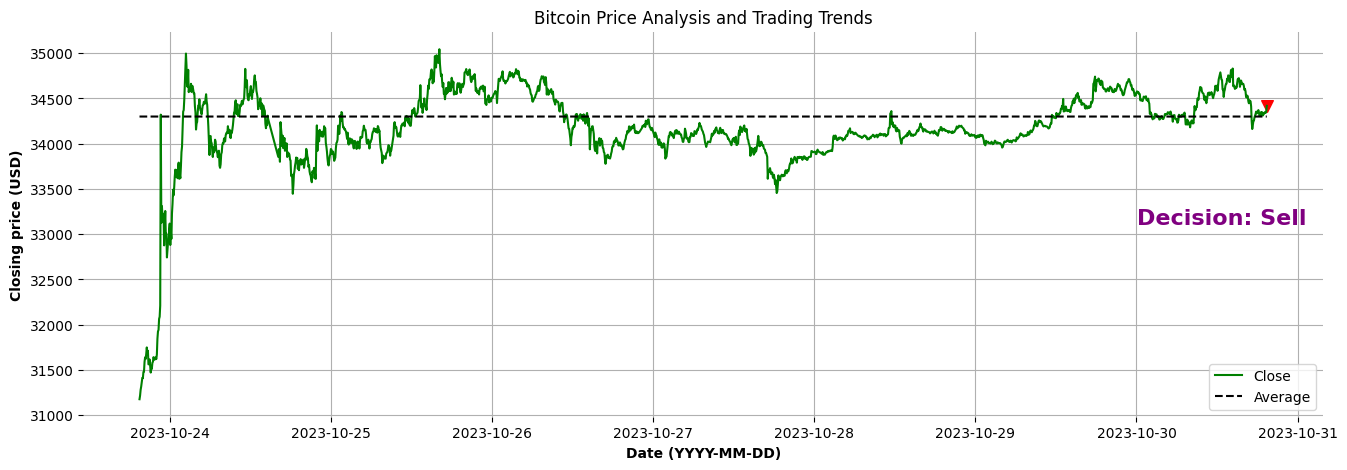

In [152]:
#Realizamos la ejecución de la función de visualización
data_visualization()

## 6.1- Automatización

Para finalizar con nuestro análisis, desarrollaremos la solución para que se ejecute de manera automática con ayuda de algunas librerias como lo son: <br>
**IPython.display** y **Time**

In [154]:
from IPython.display import clear_output #Libreria necesaria para actualizar limpiar los resultados de pantalla
import time                             #Utilizado para funciones referente a tiempo

Una vez que tenemos todas nuestras funciones estructuradas y validadas, procederemos a crear un ciclo infinito, en el cual se harán intervalos de 5 minutos para volver a correr la instrucción que obtendrá toda la información necesaria a traves de las funciones y generá un gráfico actualizado en cada ciclo.

[*********************100%%**********************]  1 of 1 completed


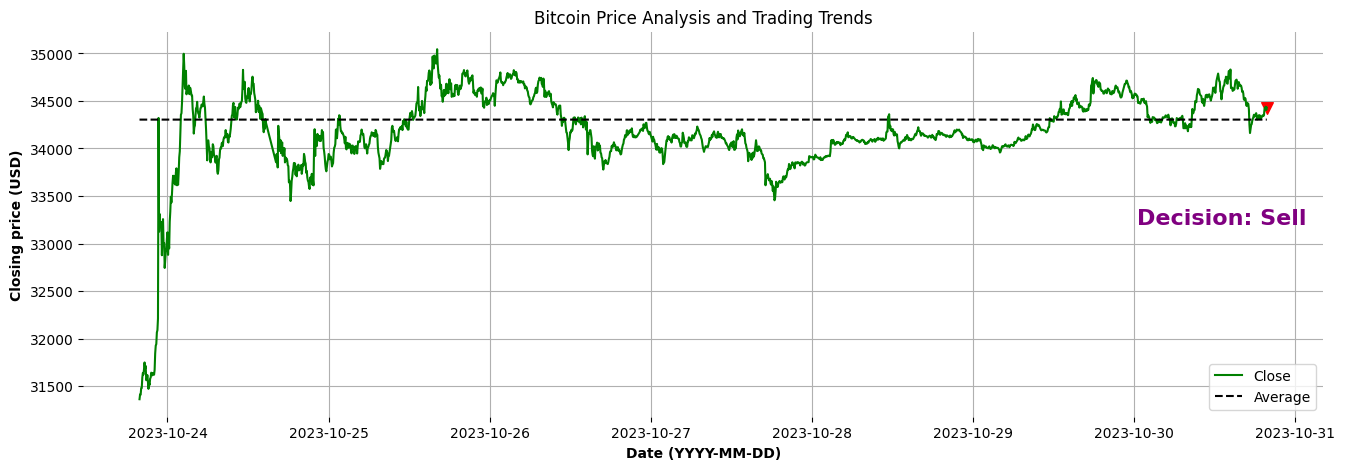

In [155]:
while(True):
    clear_output()            #Función para limpiar la gráfica y generar una nueva.
    import_bitcoin_database() #Importamos los datos desde yfinance.
    trends_extract()          #WebScraping de página web.
    data_cleaning()           #Limpieza de datos
    decision()                #Algoritmo de decisión
    data_visualization()      #Representación gráfica de la información
    time.sleep(300)           #Tiempo de espera antes de volver a iniciar el ciclo
  